## Triage Data Analysis

The analysis of ER data from 2 Hospitals will carried out to study the variables and their relationships with each other. 

In [309]:
#Import of libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from scipy import stats

In [310]:
#loading dataset
df_raw = pd.read_csv('data.csv',sep=';')

Taking a quick glimpse at the dataset to see what our columns look like at a high level

In [311]:
#Viewing the first 3 columns of the dataset
df_raw.head(3)

,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Chief_complain,Mental,Pain,NRS_pain,...,BT,Saturation,KTAS_RN,Diagnosis in ED,Disposition,KTAS_expert,Error_group,Length of stay_min,KTAS duration_min,mistriage
0,2,2,71,3,3,2,right ocular pain,1,1,2,...,36.6,100,2,Corneal abrasion,1,4,2,86,"5,00",1
1,1,1,56,12,3,2,right forearm burn,1,1,2,...,36.5,NaN,4,"Burn of hand, firts degree dorsum",1,5,4,64,"3,95",1
2,2,1,68,8,2,2,"arm pain, Lt",1,1,2,...,36.6,98,4,"Fracture of surgical neck of humerus, closed",2,5,4,862,"1,00",1


Tha dataset contains 24 rows of data containing a mix of numerical and categorical columns. Lets take a look at the number of columns and the datatypes of each of the columns. We will also check the number of unique entries in each row to get an idea of the variety of the contents of each column

In [312]:
#Checking the shape
df_raw.shape

(1267, 24)

In [313]:
#Checking the datatypes of each column
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Group                     1267 non-null   int64 
 1   Sex                       1267 non-null   int64 
 2   Age                       1267 non-null   int64 
 3   Patients number per hour  1267 non-null   int64 
 4   Arrival mode              1267 non-null   int64 
 5   Injury                    1267 non-null   int64 
 6   Chief_complain            1267 non-null   object
 7   Mental                    1267 non-null   int64 
 8   Pain                      1267 non-null   int64 
 9   NRS_pain                  1267 non-null   object
 10  SBP                       1267 non-null   object
 11  DBP                       1267 non-null   object
 12  HR                        1267 non-null   object
 13  RR                        1267 non-null   object
 14  BT                      

In [314]:
#Checking the number of unique values in each column
df_raw.nunique()

Group                         2
Sex                           2
Age                          81
Patients number per hour     16
Arrival mode                  7
Injury                        2
Chief_complain              417
Mental                        4
Pain                          2
NRS_pain                     11
SBP                         127
DBP                          83
HR                           94
RR                           11
BT                           46
Saturation                   22
KTAS_RN                       5
Diagnosis in ED             583
Disposition                   7
KTAS_expert                   5
Error_group                  10
Length of stay_min          716
KTAS duration_min           392
mistriage                     3
dtype: int64

The dataset contains several columns with entries that are numerical but represent string. For example the 'Mental' Column has numeric entries that stand for status i.e Alert,unconcious etc) We will convert these to text for the purposes of exploratory data analysis for ease of reading and interpretation

## Data Cleaning

### Reformatting number based columns to text

In [315]:
df_raw['mistriage'].replace({0: 'Correct', 1: 'Over triage', 2: 'Under triage'}, inplace=True)
df_raw['Group'].replace({1: 'Local ED' , 2: 'Regional ED'}, inplace=True)
df_raw['Injury'].replace({1: 'non-injured' , 2: 'injury'}, inplace=True)
df_raw['Sex'].replace({1: 'Female' , 2: 'Male'}, inplace=True)
df_raw['Pain'].replace({1: 'pain' , 0: 'non-pain'}, inplace=True)
df_raw['NRS_pain'].replace({ '#BO�!': 0}, inplace=True) 
df_raw['Mental'].replace({1: 'Alert',2: 'Verbal Resppne',3: 'Pain Response',4: 'unconcious'}, inplace=True)
df_raw['Disposition'].replace({1: 'Discharge',2: 'Ward admission', 3: 'ICU admission', 4: 'AMA discharge', 5: 'Transfer',6: 'Death' , 7: 'OP fom ED'},inplace=True)
df_raw['Arrival mode'].replace({1: 'Walking',2: '119 use',3: 'Private car',4: 'Private ambulance',5: 'Public transporation (Police ets)',6: 'Wheelchair', 7: 'Others'}, inplace=True)

In [316]:
df_raw.head(3)

,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Chief_complain,Mental,Pain,NRS_pain,...,BT,Saturation,KTAS_RN,Diagnosis in ED,Disposition,KTAS_expert,Error_group,Length of stay_min,KTAS duration_min,mistriage
0,Regional ED,Male,71,3,Private car,injury,right ocular pain,Alert,pain,2,...,36.6,100,2,Corneal abrasion,Discharge,4,2,86,"5,00",Over triage
1,Local ED,Female,56,12,Private car,injury,right forearm burn,Alert,pain,2,...,36.5,NaN,4,"Burn of hand, firts degree dorsum",Discharge,5,4,64,"3,95",Over triage
2,Regional ED,Female,68,8,119 use,injury,"arm pain, Lt",Alert,pain,2,...,36.6,98,4,"Fracture of surgical neck of humerus, closed",Ward admission,5,4,862,"1,00",Over triage


Our dataset is now much easier to interpret and explore since our categorical columns have text instead of numbers that require interpretation

### Droping irrelavent columns 

The dataset contains columns that are not applicable to the objective of the project. The dataset is from a comparison of Triage scores assigned at the ER and a retrospective score provided by KTAS experts and an analysis of why the scores are different. therefore columns applicable to this comparison ('KTAS_RN','Error_group','mistriage') will be removed.  

In [317]:
#dropping columns that are not required
df_raw.drop(['KTAS_RN','Error_group','mistriage','Disposition'],axis=1, inplace=True)

### Identifying and dealing with duplicate/missing values

In [318]:
#Checking to see if any rows are duplicated
df_raw.duplicated().sum()

0

In [325]:
df_raw.isna().sum(axis=0)/df_raw.shape[0]*100

Group                        0.000000
Sex                          0.000000
Age                          0.000000
Patients number per hour     0.000000
Arrival mode                 0.000000
Injury                       0.000000
Chief_complain               0.000000
Mental                       0.000000
Pain                         0.000000
NRS_pain                     0.000000
SBP                          0.000000
DBP                          0.000000
HR                           0.000000
RR                           0.000000
BT                           0.000000
Saturation                  55.011839
Diagnosis in ED              0.157853
KTAS_expert                  0.000000
Length of stay_min           0.000000
KTAS duration_min            0.000000
dtype: float64

##### 55% of the Saturation column is missing entries which is a significant amount 

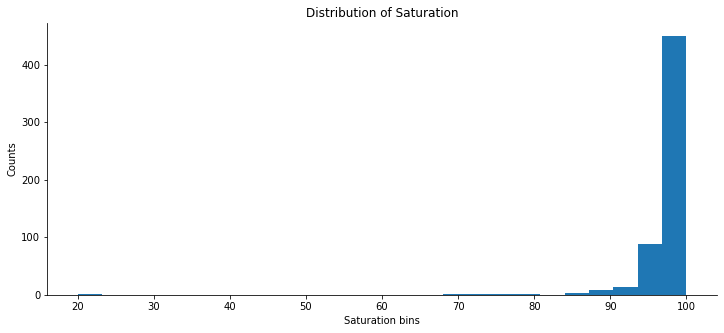

In [326]:
plt.figure(figsize=(12, 5))

plt.hist(df_raw["Saturation"], bins=25)

plt.title("Distribution of Saturation")
plt.ylabel('Counts')
plt.xlabel("Saturation bins")
sns.despine()

plt.show()

In [327]:
df_raw['Saturation'] = df_raw['Saturation'].apply(pd.to_numeric, errors='coerce')

In [328]:
df_raw["Saturation"].describe()

count    570.000000
mean      97.024561
std        4.350556
min       20.000000
25%       97.000000
50%       98.000000
75%       98.000000
max      100.000000
Name: Saturation, dtype: float64

Since the majority of saturation are between 90-100 with a low standard deviation. The missing valuies will be replaced with mean

In [306]:
mean_saturation=df_raw["Saturation"].mean()
df_raw["Saturation"]=df_raw["Saturation"].fillna(mean_saturation)

## Exploratory data analysis

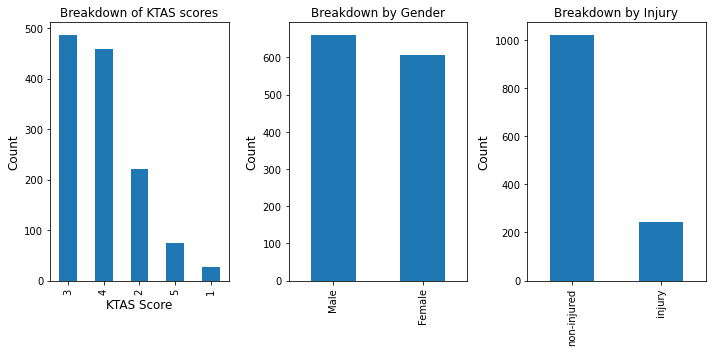

In [303]:
plt.subplots(1, 3) 

plt.subplot(1, 3, 1)  # (2,1) = total plot size, (0,0) = coordinates for *this* plot
df_raw['KTAS_expert'].value_counts().plot(kind='bar',figsize=[10,5])
plt.xlabel('KTAS Score', size=12)

plt.ylabel('Count', size=12)
plt.title('Breakdown of KTAS scores')

plt.subplot(1, 3, 2)
df_raw['Sex'].value_counts().plot(kind='bar')
plt.ylabel('Count',size=12)
plt.title('Breakdown by Gender')

plt.subplot(1, 3, 3)
df_raw['Injury'].value_counts().plot(kind='bar')
plt.ylabel('Count',size=12)
plt.title('Breakdown by Injury')

plt.tight_layout() # Keeps plots from overlapping each other

plt.show()

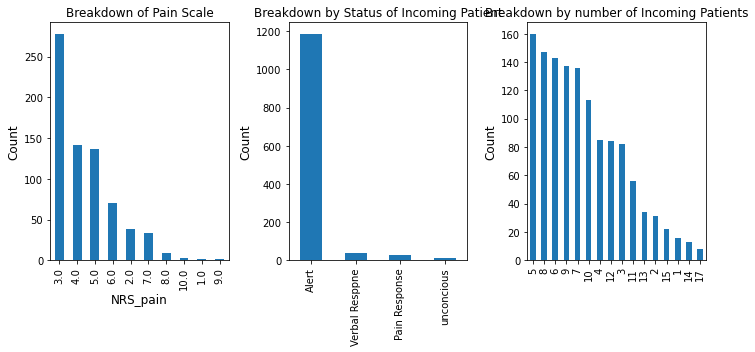

In [304]:
plt.subplots(1, 3) 

plt.subplot(1, 3, 1)  # (2,1) = total plot size, (0,0) = coordinates for *this* plot
df_raw['NRS_pain'].value_counts().plot(kind='bar',figsize=[10,5])
plt.xlabel('NRS_pain', size=12)
plt.ylabel('Count', size=12)
plt.title('Breakdown of Pain Scale')

plt.subplot(1, 3, 2)
df_raw['Mental'].value_counts().plot(kind='bar')
plt.ylabel('Count',size=12)
plt.title('Breakdown by Status of Incoming Patient')

plt.subplot(1, 3, 3)
df_raw['Patients number per hour'].value_counts().plot(kind='bar')
plt.ylabel('Count',size=12)
plt.title('Breakdown by number of Incoming Patients')

plt.tight_layout() # Keeps plots from overlapping each other

plt.show()

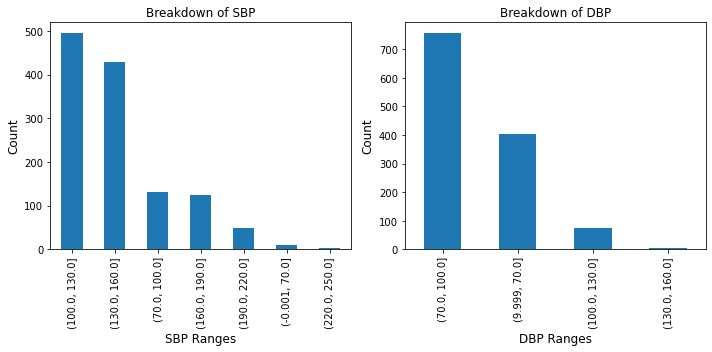

In [276]:
plt.subplots(1, 2) 

plt.subplot(1, 2, 1)  # (2,1) = total plot size, (0,0) = coordinates for *this* plot
df_raw['SBP'].value_counts(bins=[0.0,70,100,130,160,190,220,250]).plot(kind='bar',figsize=[10,5])
plt.xlabel('SBP Ranges', size=12)
plt.ylabel('Count', size=12)
plt.title('Breakdown of SBP')

plt.subplot(1, 2, 2)
df_raw['DBP'].value_counts(bins=[10,70,100,130,160]).plot(kind='bar',figsize=[10,5])
plt.ylabel('Count',size=12)
plt.xlabel('DBP Ranges', size=12)
plt.title('Breakdown of DBP')

plt.tight_layout() # Keeps plots from overlapping each other

plt.show()

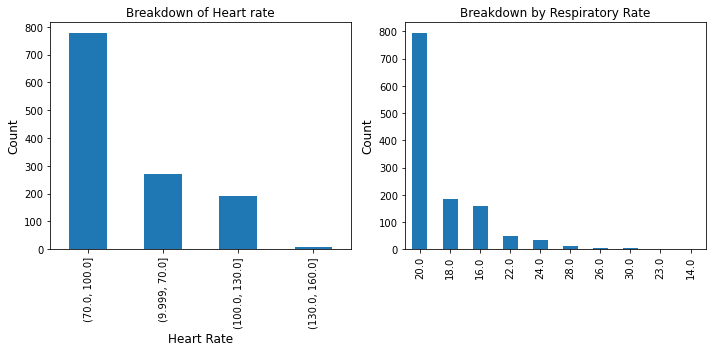

In [282]:
plt.subplots(1, 2) 

plt.subplot(1, 2, 1)  # (2,1) = total plot size, (0,0) = coordinates for *this* plot
df_raw['HR'].value_counts(bins=[10,70,100,130,160]).plot(kind='bar',figsize=[10,5])
plt.xlabel('Heart Rate', size=12)
plt.ylabel('Count', size=12)
plt.title('Breakdown of Heart rate')

plt.subplot(1, 2, 2)
df_raw['RR'].value_counts().plot(kind='bar',figsize=[10,5])
plt.ylabel('Count',size=12)
plt.title('Breakdown by Respiratory Rate')

plt.tight_layout() # Keeps plots from overlapping each other

plt.show()

<AxesSubplot:>

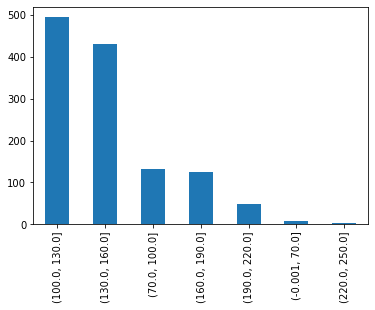

In [241]:
df_raw['SBP'].value_counts(bins=[0.0,70,100,130,160,190,220,250])

In [272]:
df_raw['DBP'].value_counts(bins=[10,70,100,130,160])

(70.0, 100.0]     756
(9.999, 70.0]     402
(100.0, 130.0]     76
(130.0, 160.0]      4
Name: DBP, dtype: int64

In [281]:
df_raw['HR'].value_counts(bins=[10,70,100,130,160])

(70.0, 100.0]     777
(9.999, 70.0]     270
(100.0, 130.0]    193
(130.0, 160.0]      7
Name: HR, dtype: int64

In [145]:
df_raw['RR'].value_counts()

20    793
18    186
16    159
22     50
24     34
??     22
28     13
26      4
30      3
23      2
14      1
Name: RR, dtype: int64

### Investigating Relationships between variables

<AxesSubplot:title={'center':'Average patient pain score by KTAS score'}, xlabel='KTAS_expert', ylabel='Average NRS Pain Score'>

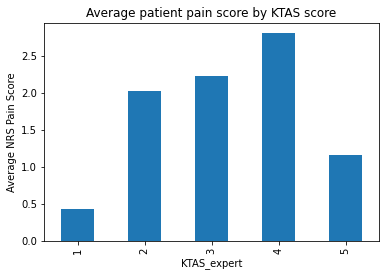

In [246]:
df_raw.groupby('KTAS_expert')['NRS_pain'].mean().plot(kind='bar',title='Average patient pain score by KTAS score',ylabel='Average NRS Pain Score')

<AxesSubplot:ylabel='KTAS_expert'>

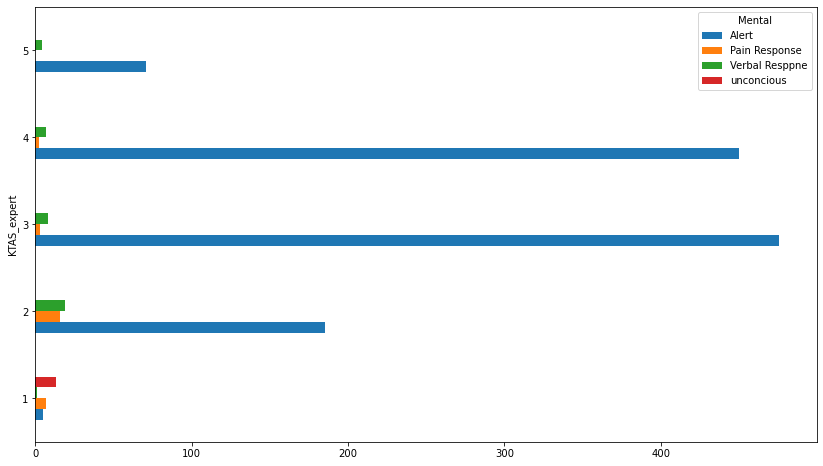

In [238]:
df_raw.groupby('KTAS_expert')['Mental'].value_counts().unstack(level=-1).plot(kind = 'barh', rot = 0, figsize=[14,8],ylabel='Count')

<AxesSubplot:xlabel='KTAS_expert', ylabel='Count'>

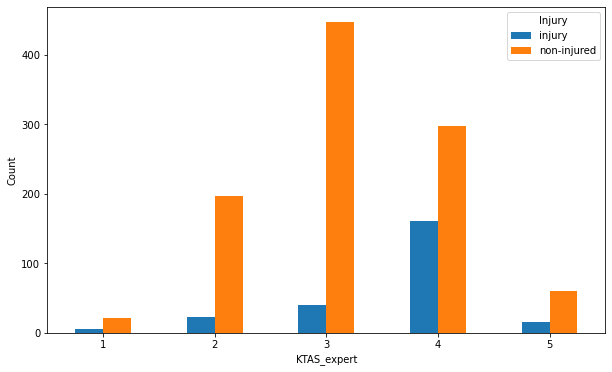

In [231]:
df_raw.groupby('KTAS_expert')['Injury'].value_counts().unstack(level=-1).plot(kind = 'bar', rot = 0, figsize=[10,6],ylabel='Count')

TypeError: text() missing 2 required positional arguments: 'y' and 's'

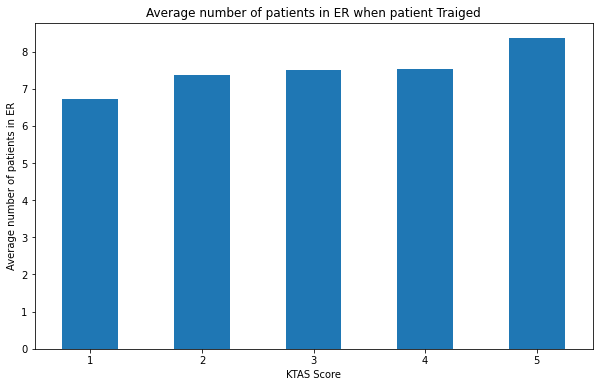

In [284]:
df_raw.groupby('KTAS_expert')['Patients number per hour'].mean().plot(kind = 'bar', rot = 0, figsize=[10,6],title='Average number of patients in ER when patient Traiged',ylabel='Average number of patients in ER',xlabel='KTAS Score')


### Findings


Patients with a high triage score are more likely to be injured

Patients assigned a non emergency triage score usually occurs when ER is more crowded (high number of patients per hour)

Non emergency patients report a higher Pain level

Unconcious patients are more likely to be assigned a high emergency triage score
